In [6]:
import os
import sys
sys.path.insert(0,'./tools/')
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import cmocean as cmo

import cartopy.crs as ccrs

from tools.config import OPSAREA, MAPEXTENT
from maps import *

In [7]:
# get ops area polygon and shore line
map_url = 'https://raw.githubusercontent.com/NASA-SMODE/Maps/main/tools/' 
shore = pd.read_json(map_url + 'NorthCalShoreLine.json')
opsarea = pd.read_json(map_url + 'ops_area_polygon.json')

In [2]:
# Settings
figdir  = 'img/'
filename = 'SSTSnapshot'
extension = ['png']
figproperties = dict(dpi=200,bbox_inches='tight')

In [3]:
# Get the data from WHOI's S-MODE thredds
url = 'http://smode.whoi.edu:8080/thredds/dodsC/satellite/VIIRS_NRT/VIIRS_NRT_20210929T213000Z.nc'
sst = xr.open_dataset(url)

In [4]:
sst

<xarray.Dataset>
Dimensions:                  (ni: 1139, nj: 697, time: 1)
Coordinates:
  * time                     (time) object 2021-09-29 21:30:01
    lat                      (nj, ni) float32 ...
    lon                      (nj, ni) float32 ...
Dimensions without coordinates: ni, nj
Data variables:
    sea_surface_temperature  (time, nj, ni) float32 ...
    quality_level            (time, nj, ni) float32 ...
Attributes:
    geospatial_bounds:                        POLYGON((-106.573  70.289, -110...
    geospatial_first_scanline_first_fov_lat:  36.07733
    geospatial_first_scanline_first_fov_lon:  -110.40772
    geospatial_first_scanline_last_fov_lat:   31.129335
    geospatial_first_scanline_last_fov_lon:   -143.09029
    geospatial_last_scanline_first_fov_lat:   70.288795
    geospatial_last_scanline_first_fov_lon:   -106.57297
    geospatial_last_scanline_last_fov_lat:    60.344727
    geospatial_last_scanline_last_fov_lon:    -173.05504
    Conventions:                              CF-1.6, ACDD-1.3
    Metadata_Conventions:                     Unidata Dataset Discovery v1.0
    acknowledgement:                          Please acknowledge the use of t...
    cdm_data_type:                            swath
    comment:                                  none
    creator_email:                            Alex.Ignatov@noaa.gov
    creator_name:                             Alex Ignatov
    creator_url:                              http://www.star.nesdis.noaa.gov
    date_created:                             20210929T220558Z
    destripe:                                 yes (M5:1.0:f M7:1.0:f M10:1.0:...
    easternmost_longitude:                    -106.57297
    file_quality_level:                       3
    gds_version_id:                           02.0
    geospatial_lat_resolution:                0.0067
    geospatial_lat_units:                     degrees_north
    geospatial_lon_resolution:                0.0067
    geospatial_lon_units:                     degrees_east
    history:                                  Created by Advanced Clear-Sky P...
    id:                                       VIIRS_NPP-OSPO-L2P-v2.61
    institution:                              NOAA/NESDIS/OSPO
    keywords:                                 Oceans > Ocean Temperature > Se...
    keywords_vocabulary:                      NASA Global Change Master Direc...
    license:                                  GHRSST protocol describes data ...
    metadata_link:                            http://podaac.jpl.nasa.gov/ws/m...
    naming_authority:                         org.ghrsst
    northernmost_latitude:                    70.836136
    platform:                                 NPP
    processing_level:                         L2P
    product_version:                          2.61
    project:                                  Group for High Resolution Sea S...
    publisher_email:                          ghrsst-po@nceo.ac.uk
    publisher_name:                           The GHRSST Project Office
    publisher_url:                            http://www.ghrsst.org
    references:                               Data convention: GHRSST Data Sp...
    sensor:                                   VIIRS
    aggregator_version:                       V1.00
    preprocessor_version:                     1.14
    sst_luts:                                 LUT_VIIRS_NPP_L2P_DEPTH_DAY_V01...
    source:                                   VIIRS-MOD-GEO-TC,VIIRS-M5-SDR,V...
    southernmost_latitude:                    31.129335
    spatial_resolution:                       742 m at nadir
    standard_name_vocabulary:                 CF Standard Name Table (v26, 08...
    start_time:                               20210929T213000Z
    stop_time:                                20210929T213959Z
    summary:                                  Sea surface temperature retriev...
    time_coverage_end:                        20210929T213959Z
    time_coverage_start:   

# A quick-and-dirty plot

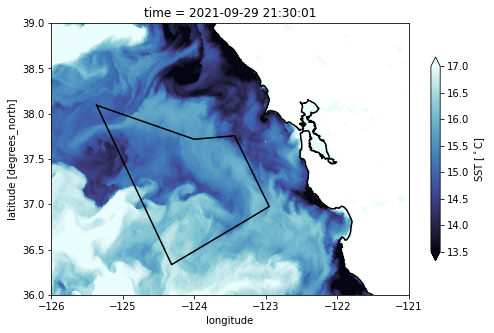

In [8]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)

kwargs = dict(vmin=13.5,vmax=17,
              cmap=cmo.cm.ice,ax=ax,
              add_colorbar=False)

im = (sst.sea_surface_temperature.\
                isel(time=0)-273.15).\
                plot.pcolormesh(x='lon',
                                y='lat',
                                **kwargs
                )

shore.plot(x = 'longitude',
           y = 'latitude', 
           color = 'k',
           legend=False,
           ax = ax
)

opsarea.plot(x = 'longitude',
             y = 'latitude', 
             color = 'k',
             legend=False,
             ax = ax
)

ax.set_xlim(*MAPEXTENT[:2])
ax.set_ylim(*MAPEXTENT[2:])

plt.colorbar(im,label=r'SST [$^\circ$C]',
             shrink=0.75,extend='both')

## A publication-quality plot

In [11]:
projection = ccrs.PlateCarree(
                central_longitude=(MAPEXTENT[0]+MAPEXTENT[1])/2
)

map_axes = (GeoAxes,{'map_projection':projection})

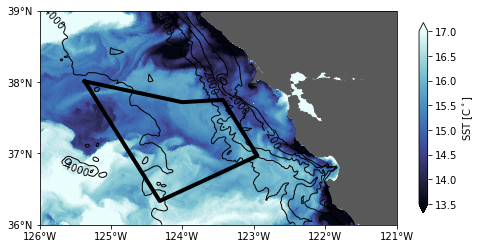

In [13]:
fig = plt.figure(figsize=(8,7))

ax = fig.add_subplot(111, projection=projection)     

ax.set_extent(MAPEXTENT)


kwargs = dict(vmin=13.5,vmax=17,
              cmap=cmo.cm.ice,ax=ax,
              add_colorbar=False,
              transform=ccrs.PlateCarree())

im = (sst.sea_surface_temperature.\
                isel(time=0)-273.15).\
                plot.pcolormesh(x='lon',
                                y='lat',
                                **kwargs
                )

# Topography
plot_topography(ax, 
                transform=ccrs.PlateCarree(),
                colors=False)

# Map properties (continent, labels, grid)
plot_map_properties(ax,
                    transform=ccrs.PlateCarree(),
                    continent_facecolor='0.35')

# SMODE area
plot_operations_area(ax=ax,
                     transform=ccrs.PlateCarree(),
                     add_label=False,
)

fig.colorbar(im,shrink=0.5,extend='both',
             label=r'SST [C$^\circ$]')

fig.savefig(os.path.join(
                figdir,filename+'_cartopy.'+extension[0]),
            **figproperties)